# Evaluating the XGBoost Model for Predicting Atmospheric Emissions

In this notebook, we will load the trained XGBoost model, make predictions on the test dataset, and evaluate the model's performance using various metrics.

---

## Objectives:
- Load the saved XGBoost model.
- Make predictions on the test dataset.
- Evaluate the performance of the model.


In [1]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the path to the saved model and test data
MODEL_PATH = '../../models/xgboost_model.json' 
TEST_DATA_PATH = '../../data/processed/test_data.csv'

# Load the test data
test_data = pd.read_csv(TEST_DATA_PATH)

# Define the target columns (pollutants)
TARGET_COLUMNS = ['nox', 'pm10', 'pm2.5', 'so2']

# Separate the features (X_test) and target (y_test)
X_test = test_data.drop(columns=TARGET_COLUMNS)
y_test = test_data[TARGET_COLUMNS]

# Load the saved model
xgb_model = xgb.XGBRegressor()
xgb_model.load_model(MODEL_PATH)

print("Model loaded successfully.")


Model loaded successfully.


## Making Predictions on the Test Dataset
We will use the XGBoost trained model to predict pollutant values based on the features in the test dataset.


In [2]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Convert predictions to DataFrame for easier comparison
y_pred_df = pd.DataFrame(y_pred, columns=TARGET_COLUMNS)

# Display the first few predicted values
y_pred_df.head()


,nox,pm10,pm2.5,so2
0,0.050937,-0.076037,-0.117745,-0.017377
1,-0.074208,-0.113338,-0.180196,-0.013467
2,-0.074275,0.557744,-0.081728,-0.014692
3,-0.070121,-0.076853,-0.162502,-0.014289
4,-0.015396,-0.040915,-0.076863,-0.014324


## Evaluating the Model Performance

We will evaluate the model's performance using the following metrics:
- **Mean Squared Error (MSE)**
- **R-squared (R²)**

These metrics will help us determine how well the model performs on the test data.


In [3]:
# Calculate Mean Squared Error and R-squared for each pollutant
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Evaluate each pollutant separately
for pollutant in TARGET_COLUMNS:
    mse_pollutant = mean_squared_error(y_test[pollutant], y_pred_df[pollutant])
    r2_pollutant = r2_score(y_test[pollutant], y_pred_df[pollutant])
    print(f"\nPollutant: {pollutant}")
    print(f"  Mean Squared Error (MSE): {mse_pollutant}")
    print(f"  R-squared (R²): {r2_pollutant}")


Mean Squared Error (MSE): 1.030501155992772
R-squared (R²): -4.707204818725586

Pollutant: nox
  Mean Squared Error (MSE): 1.7555953498466115
  R-squared (R²): -6.548878576820543

Pollutant: pm10
  Mean Squared Error (MSE): 0.5751561569286248
  R-squared (R²): -0.44850835134960976

Pollutant: pm2.5
  Mean Squared Error (MSE): 0.8953657162555962
  R-squared (R²): 0.12545398830836618

Pollutant: so2
  Mean Squared Error (MSE): 0.8958874009402634
  R-squared (R²): -11.957768124408075


## Visualizing Predictions vs Actual Values

We can create visualizations to compare the actual pollutant values with the predicted values. This helps us understand how well the model performs visually.


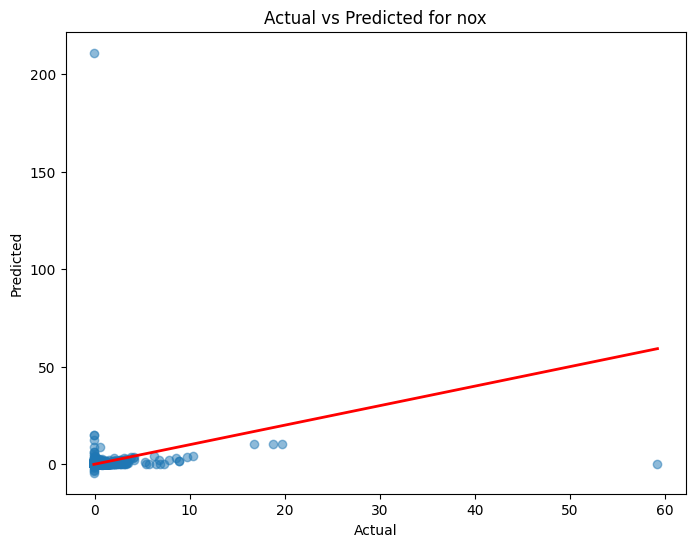

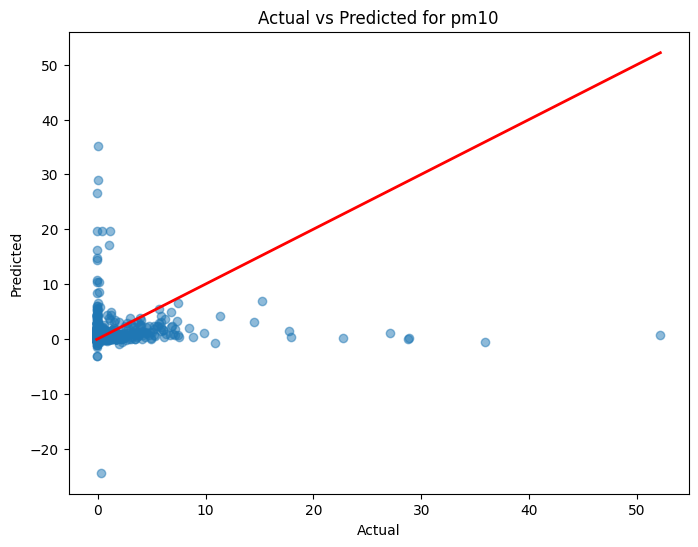

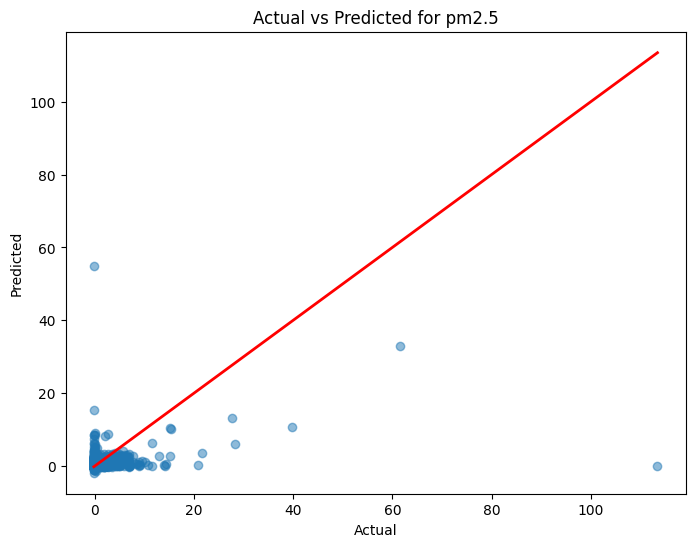

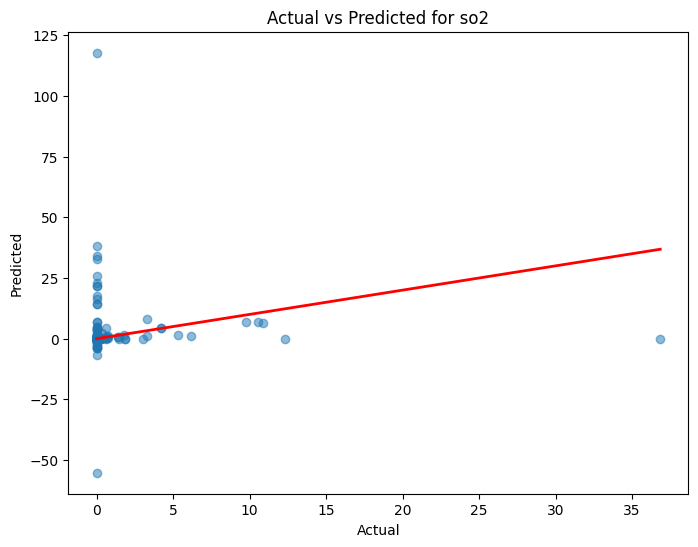

In [4]:
# Plot actual vs predicted values for each pollutant
for pollutant in TARGET_COLUMNS:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[pollutant], y_pred_df[pollutant], alpha=0.5)
    plt.plot([y_test[pollutant].min(), y_test[pollutant].max()], 
             [y_test[pollutant].min(), y_test[pollutant].max()], color='red', linewidth=2)
    plt.title(f"Actual vs Predicted for {pollutant}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
